In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='cp1252', header =0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df = df[df['CustomerID'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df = df[df['CustomerID'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df['InvoiceDay'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
dt.timedelta(1)

datetime.timedelta(days=1)

In [ ]:
pin_date = max(df['InvoiceDay']) + dt.timedelta(1)
pin_date

Timestamp('2011-12-10 00:00:00')

In [ ]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [ ]:
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [ ]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [ ]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm
rfm.to_csv('rfm.csv')

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
!ls

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,225 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ub

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Cluster Analysis using Kmeans").getOrCreate()
spark

In [ ]:
df = spark.read.csv("/content/rfm.csv", header=True, inferSchema=True)
df.show()

+----------+-------+---------+--------+---+---+---+
|CustomerID|Recency|Frequency|Monetary|  R|  F|  M|
+----------+-------+---------+--------+---+---+---+
|   12346.0|    326|        2|     0.0|  1|  1|  1|
|   12347.0|      3|      182|  4310.0|  4|  4|  4|
|   12348.0|     76|       31| 1797.24|  2|  2|  4|
|   12349.0|     19|       73| 1757.55|  3|  3|  4|
|   12350.0|    311|       17|   334.4|  1|  1|  2|
|   12352.0|     37|       95| 1545.41|  3|  3|  3|
|   12353.0|    205|        4|    89.0|  1|  1|  1|
|   12354.0|    233|       58|  1079.4|  1|  3|  3|
|   12355.0|    215|       13|   459.4|  1|  1|  2|
|   12356.0|     23|       59| 2811.43|  3|  3|  4|
|   12357.0|     34|      131| 6207.67|  3|  4|  4|
|   12358.0|      2|       19| 1168.06|  4|  2|  3|
|   12359.0|      8|      254| 6245.53|  4|  4|  4|
|   12360.0|     53|      129| 2662.06|  2|  4|  4|
|   12361.0|    288|       10|   189.9|  1|  1|  1|
|   12362.0|      4|      274| 5154.58|  4|  4|  4|
|   12363.0|

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

columns_for_clustering = ["R", "F", "M"]
assembler = VectorAssembler(inputCols=columns_for_clustering, outputCol="features")
assembled_df = assembler.transform(df)

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

In [ ]:
kmeans = KMeans(k=10, maxIter=300, seed=42, featuresCol="scaledFeatures", predictionCol="prediction")
model = kmeans.fit(scaled_df)

In [ ]:
predictions = model.transform(scaled_df)
predictions = predictions.withColumnRenamed("prediction", "kmeans_cluster")
predictions.show()
result_df = predictions.select(*columns_for_clustering, "kmeans_cluster")
result_df.show()
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

+----------+-------+---------+--------+---+---+---+-------------+--------------------+--------------+
|CustomerID|Recency|Frequency|Monetary|  R|  F|  M|     features|      scaledFeatures|kmeans_cluster|
+----------+-------+---------+--------+---+---+---+-------------+--------------------+--------------+
|   12346.0|    326|        2|     0.0|  1|  1|  1|[1.0,1.0,1.0]|[0.89518749056383...|             1|
|   12347.0|      3|      182|  4310.0|  4|  4|  4|[4.0,4.0,4.0]|[3.58074996225533...|             4|
|   12348.0|     76|       31| 1797.24|  2|  2|  4|[2.0,2.0,4.0]|[1.79037498112766...|             0|
|   12349.0|     19|       73| 1757.55|  3|  3|  4|[3.0,3.0,4.0]|[2.6855624716915,...|             6|
|   12350.0|    311|       17|   334.4|  1|  1|  2|[1.0,1.0,2.0]|[0.89518749056383...|             5|
|   12352.0|     37|       95| 1545.41|  3|  3|  3|[3.0,3.0,3.0]|[2.6855624716915,...|             6|
|   12353.0|    205|        4|    89.0|  1|  1|  1|[1.0,1.0,1.0]|[0.89518749056383

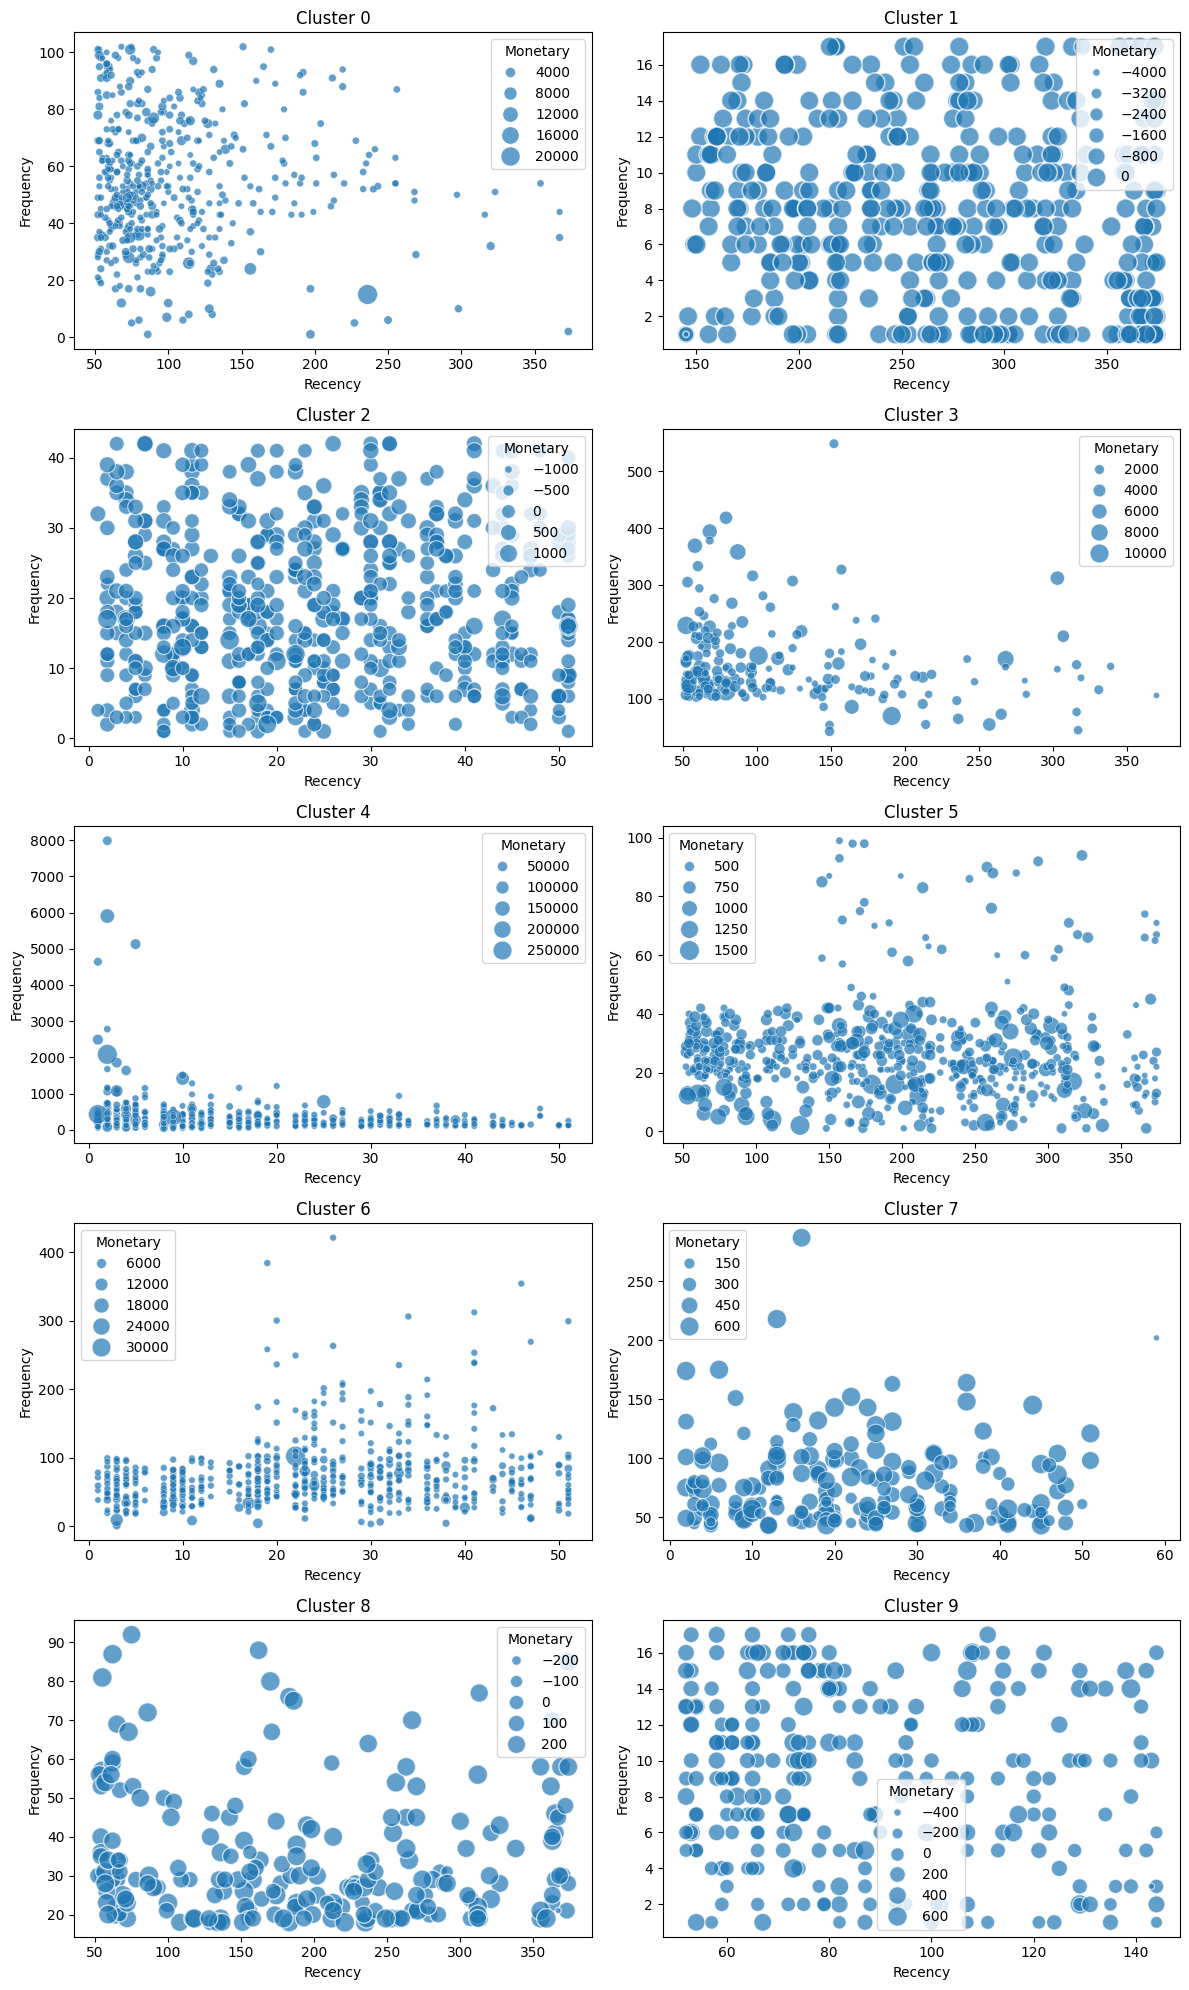

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


pandas_df = predictions.select("Recency", "Frequency", "Monetary", "kmeans_cluster").toPandas()

num_clusters = 10

fig, axes = plt.subplots(num_clusters // 2, 2, figsize=(12, 20))
axes = axes.ravel()

for cluster_id in range(num_clusters):
    cluster_data = pandas_df[pandas_df['kmeans_cluster'] == cluster_id]

    sns.scatterplot(
        data=cluster_data,
        x='Recency',
        y='Frequency',
        size='Monetary',
        sizes=(20, 200),
        alpha=0.7,
        ax=axes[cluster_id]
    )

    axes[cluster_id].set_title(f'Cluster {cluster_id}')
    axes[cluster_id].set_xlabel('Recency')
    axes[cluster_id].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


In [ ]:
from pyspark.sql import functions as F

dff = spark.read.csv("/content/OnlineRetail.csv", header=True, inferSchema=True)

num_clusters = 10

cluster_recommendations = {}


for cluster_id in range(num_clusters):
    customers_in_cluster = predictions.filter(predictions.kmeans_cluster == cluster_id).select("CustomerID").distinct()

    cluster_transactions = dff.join(customers_in_cluster, on="CustomerID", how="inner")

    top_products_for_cluster = (
        cluster_transactions.groupBy("StockCode")
        .agg(F.count("InvoiceNo").alias("transaction_count"))
        .orderBy(F.desc("transaction_count"))
        .limit(10)
        .select("StockCode")
        .rdd.flatMap(lambda x: x)
        .collect()
    )

    cluster_recommendations[f"Cluster {cluster_id}"] = top_products_for_cluster

for cluster, recommended_products in cluster_recommendations.items():
    print(f"{cluster} -> Recommended Products: {recommended_products}")


Cluster 0 -> Recommended Products: ['22423', '85123A', '84879', '47566', 'POST', '22720', '22960', '85099B', '21212', '20725']
Cluster 1 -> Recommended Products: ['85123A', '22423', 'POST', '47566', '22457', '22427', '22969', '84879', '84946', '21232']
Cluster 2 -> Recommended Products: ['84879', 'POST', '22086', '22423', '22138', '23084', '23355', '85123A', '21034', '84946']
Cluster 3 -> Recommended Products: ['85123A', '22423', '47566', '22720', '84879', '85099B', '82482', '22960', '22961', '23298']
Cluster 4 -> Recommended Products: ['85123A', '85099B', '22423', '20725', '23203', '47566', '20727', '22197', '84879', '23209']
Cluster 5 -> Recommended Products: ['85123A', '22423', '47566', 'POST', '22720', '22960', '84879', '22457', '22470', '22178']
Cluster 6 -> Recommended Products: ['22423', '85123A', 'POST', '84879', '85099B', '23084', '22086', '22138', '20727', '47566']
Cluster 7 -> Recommended Products: ['21034', '22086', '23084', '85123A', '23321', '22197', '22469', '22578', '23